In [3]:
import pandas as pd
import numpy as np

In [5]:
import os

cwd = os.getcwd()  # Get the current working directory (cwd)
files = os.listdir(cwd)  # Get all the files in that directory
print("Files in %r: %s" % (cwd, files))

Files in 'C:\\Users\\Fedy\\Hack_for_Good\\Model_Mainntenance': ['.ipynb_checkpoints', 'Predictive_maintenance.ipynb', 'sensor.csv']


In [7]:
data=pd.read_csv('sensor.csv')

In [9]:
# Ensure 'timestamp' is in datetime format
data["timestamp"] = pd.to_datetime(data["timestamp"])

# Convert to the desired format (MM-DD)
data['day'] = data['timestamp'].dt.strftime('%m-%d')


In [10]:
data.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
Unnamed: 0,220320.0,110159.5,0.0,55079.75,110159.5,165239.25,220319.0,63601.049991
timestamp,220320,2018-06-16 11:59:29.999999488,2018-04-01 00:00:00,2018-05-09 05:59:45,2018-06-16 11:59:30,2018-07-24 17:59:15,2018-08-31 23:59:00,NaN
sensor_00,210112.0,2.372221,0.0,2.438831,2.456539,2.499826,2.549016,0.412227
sensor_01,219951.0,47.591611,0.0,46.31076,48.133678,49.47916,56.72743,3.296666
sensor_02,220301.0,50.867392,33.15972,50.39062,51.6493,52.77777,56.03299,3.66682
sensor_03,220301.0,43.752481,31.64062,42.838539,44.227428,45.3125,48.22049,2.418887
sensor_04,220301.0,590.673936,2.798032,626.6204,632.638916,637.615723,800.0,144.023912
sensor_05,220301.0,73.396414,0.0,69.97626,75.57679,80.91215,99.99988,17.298247
sensor_06,215522.0,13.501537,0.014468,13.34635,13.64294,14.53993,22.25116,2.163736
sensor_07,214869.0,15.843152,0.0,15.90712,16.16753,16.42795,23.59664,2.201155


In [11]:
data.drop(['Unnamed: 0', 'timestamp','sensor_00','sensor_15','sensor_50','sensor_51'],axis=1, inplace=True)

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
      dtype=object)

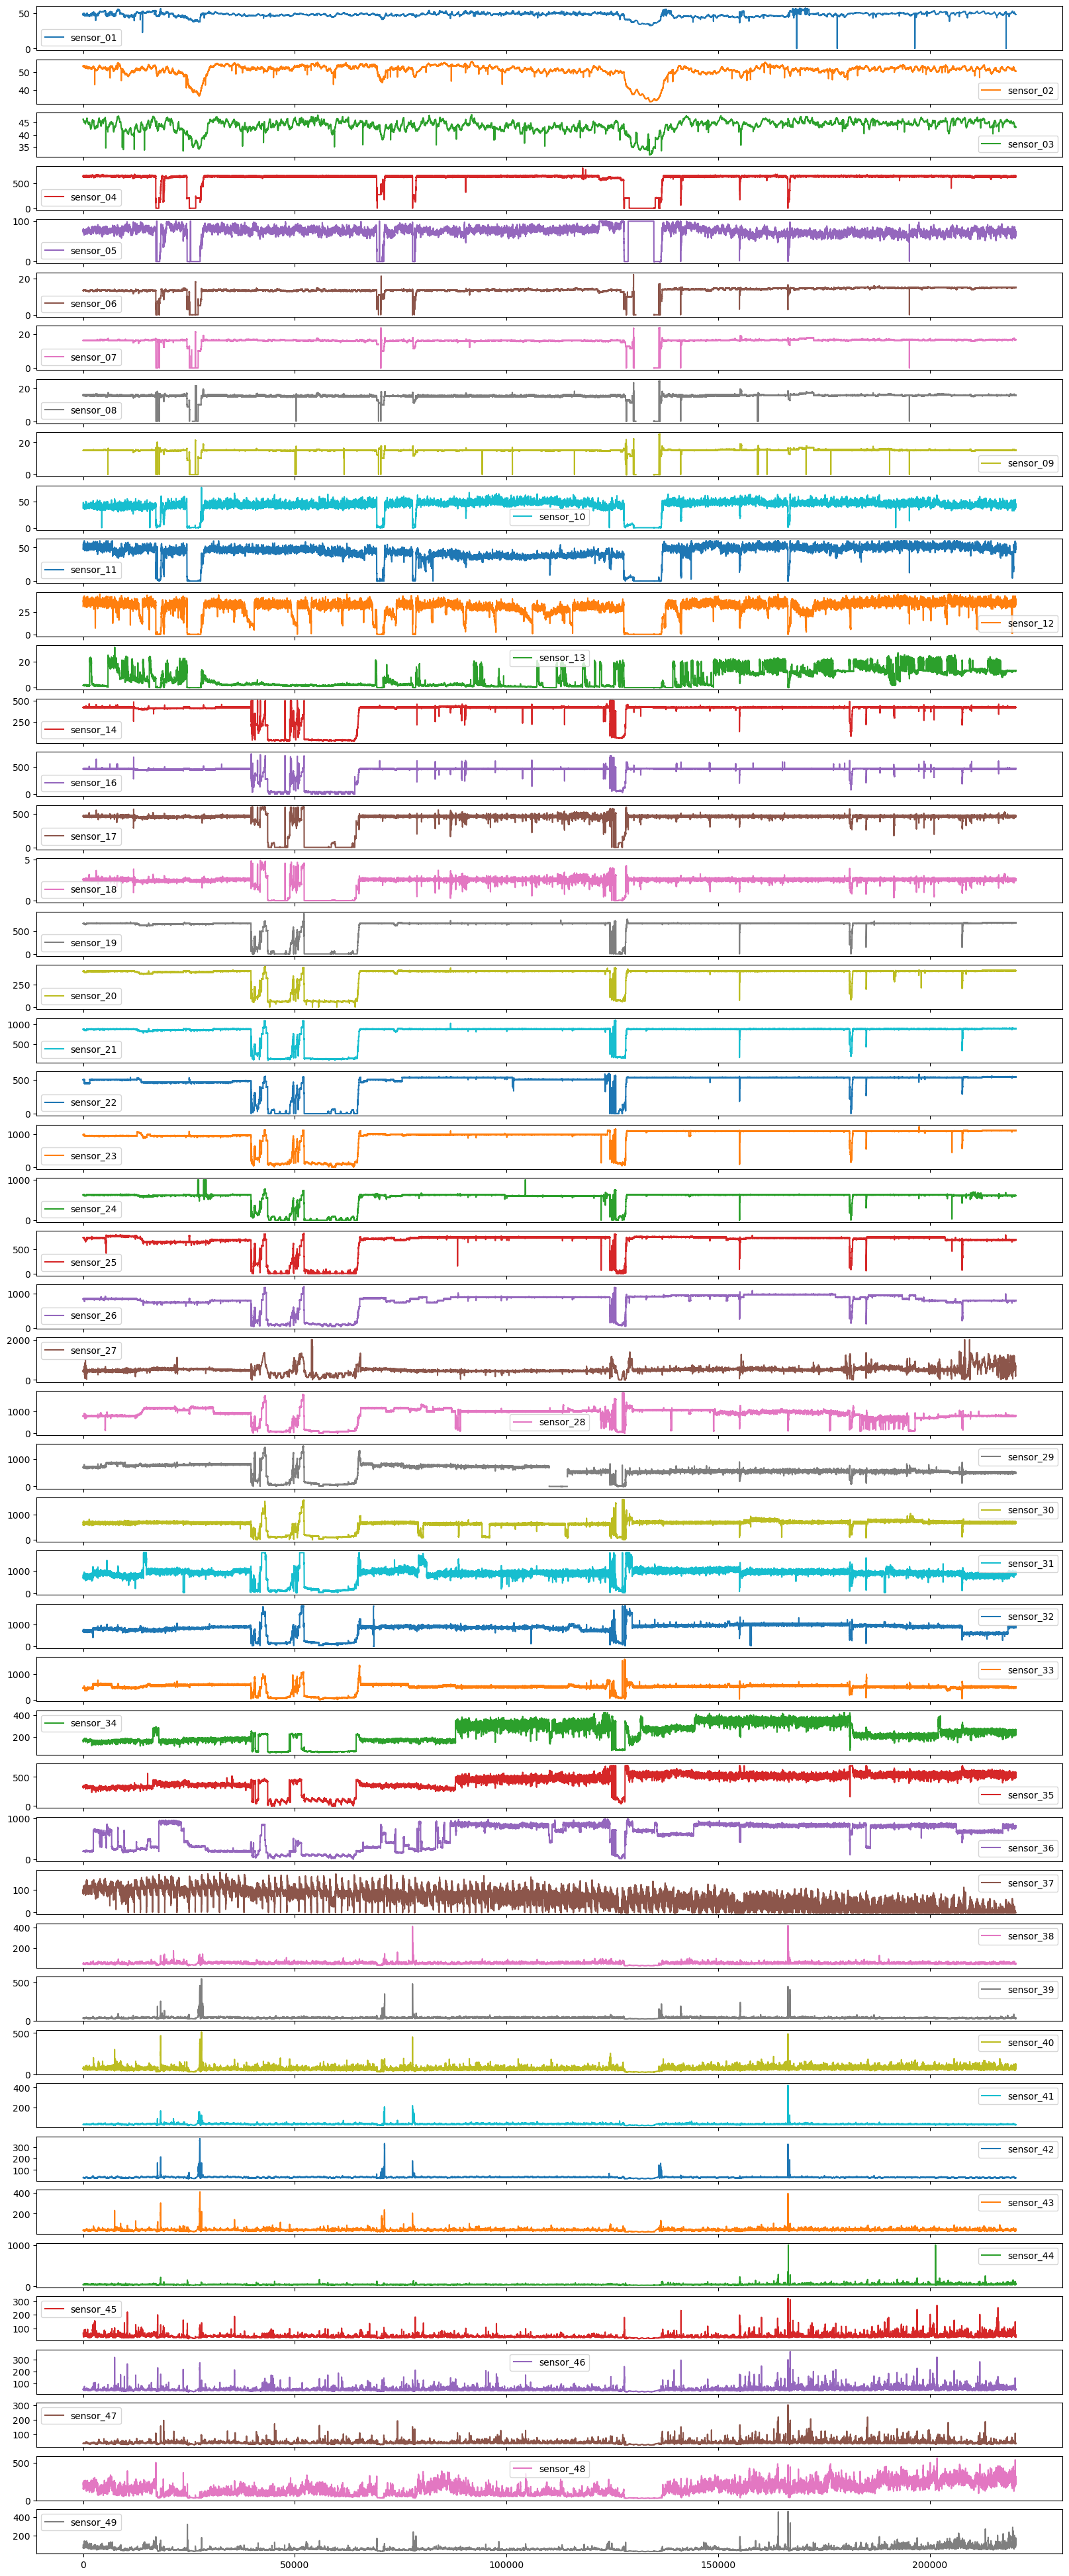

In [12]:
import matplotlib.pyplot as plt
data.plot(subplots =True, sharex = True, figsize = (20,50))

In [13]:
data['machine_status'].value_counts()

machine_status
NORMAL        205836
RECOVERING     14477
BROKEN             7
Name: count, dtype: int64

In [14]:
conditions = [(data['machine_status'] =='NORMAL'), (data['machine_status'] =='BROKEN'), (data['machine_status'] =='RECOVERING')]
choices = [1, 0, 0.5]
data['Operation'] = np.select(conditions, choices, default=0)

array([<Axes: >], dtype=object)

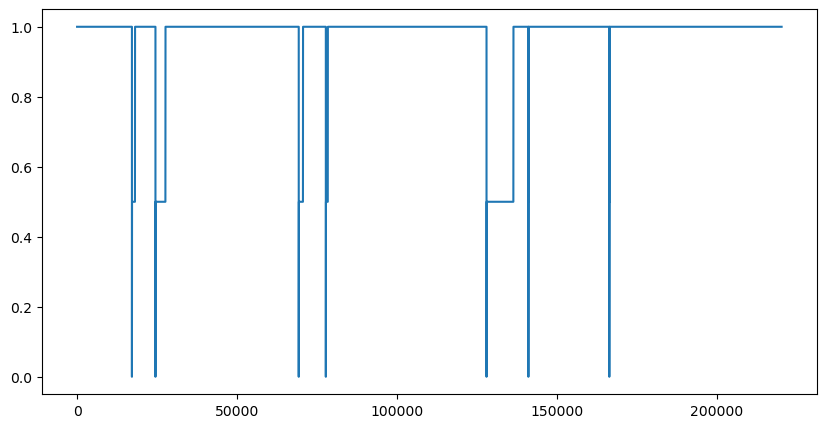

In [16]:
data['Operation'].plot(subplots =True,  figsize = (10,5))

In [18]:
df0 = pd.DataFrame(data, columns=['Operation','sensor_04', 'sensor_06', 'sensor_07', 'sensor_08', 'sensor_09'])

In [20]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    dff = pd.DataFrame(data)
    cols, names = list(), list()
    for i in range(n_in, 0, -1):
        cols.append(dff.shift(-i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    for i in range(0, n_out):
        cols.append(dff.shift(-i))
        if i==0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1)) for j in range(n_vars)]
        agg = pd.concat(cols, axis=1)
        agg.columns = names
        if dropnan:
            agg.dropna(inplace=True)
        return agg

In [21]:
from sklearn.preprocessing import MinMaxScaler

df=df0

values = df.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
reframed = series_to_supervised(scaled, 1, 1)
r = list(range(df.shape[1]+1, 2*df.shape[1]))
reframed.drop(reframed.columns[r], axis=1, inplace=True)
reframed.head()

# Data spliting into train and test data series.
values = reframed.values
n_train_time = 50000
train = values[:n_train_time, :]
test = values[n_train_time:, :]
train_x, train_y = train[:, :-1], train[:, -1]
test_x, test_y = test[:, :-1], test[:, -1]
train_x = train_x.reshape((train_x.shape[0], 1, train_x.shape[1]))
test_x = test_x.reshape((test_x.shape[0], 1, test_x.shape[1]))

In [23]:
!pip install tensorflow


C:\Users\Fedy\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
715/715 - 5s - 6ms/step - loss: 0.0194 - val_loss: 0.0013
Epoch 2/50
715/715 - 2s - 3ms/step - loss: 0.0050 - val_loss: 0.0013
Epoch 3/50
715/715 - 2s - 3ms/step - loss: 0.0043 - val_loss: 0.0017
Epoch 4/50
715/715 - 2s - 3ms/step - loss: 0.0043 - val_loss: 0.0017
Epoch 5/50
715/715 - 2s - 3ms/step - loss: 0.0043 - val_loss: 0.0017
Epoch 6/50
715/715 - 2s - 3ms/step - loss: 0.0042 - val_loss: 0.0015
Epoch 7/50
715/715 - 2s - 3ms/step - loss: 0.0041 - val_loss: 0.0014
Epoch 8/50
715/715 - 2s - 3ms/step - loss: 0.0038 - val_loss: 0.0014
Epoch 9/50
715/715 - 2s - 3ms/step - loss: 0.0035 - val_loss: 0.0013
Epoch 10/50
715/715 - 2s - 3ms/step - loss: 0.0033 - val_loss: 0.0012
Epoch 11/50
715/715 - 2s - 3ms/step - loss: 0.0030 - val_loss: 0.0011
Epoch 12/50
715/715 - 3s - 4ms/step - loss: 0.0027 - val_loss: 0.0010
Epoch 13/50
715/715 - 3s - 5ms/step - loss: 0.0024 - val_loss: 9.6379e-04
Epoch 14/50
715/715 - 3s - 4ms/step - loss: 0.0021 - val_loss: 8.7441e-04
Epoch 15/50
715/715 -

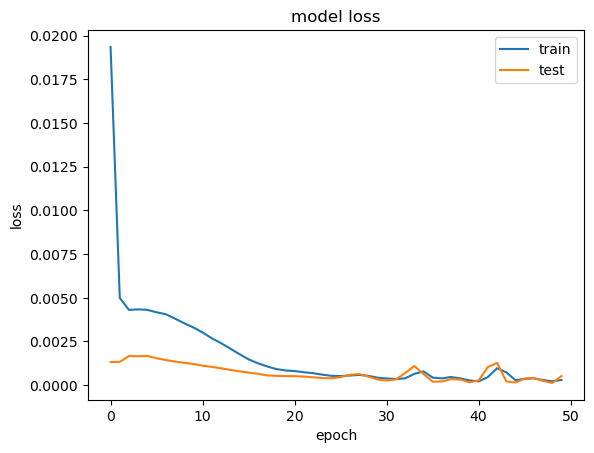

5133/5133 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step
Test RMSE: 0.023


In [24]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
import numpy as np

model = Sequential()
model.add(LSTM(100, input_shape=(train_x.shape[1], train_x.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Network fitting
history = model.fit(train_x, train_y, epochs=50, batch_size=70, validation_data=(test_x, test_y), verbose=2, shuffle=False)

# Loss history plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

size = df.shape[1]

# Prediction test
yhat = model.predict(test_x)
test_x = test_x.reshape((test_x.shape[0], size))

# invert scaling for prediction
inv_yhat = np.concatenate((yhat, test_x[:, 1-size:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_x[:, 1-size:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

In [16]:
data

,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,machine_status,day,Operation
0,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,15.56713,15.05353,37.22740,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,NORMAL,04-01,1.0
1,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,15.56713,15.05353,37.22740,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,NORMAL,04-01,1.0
2,47.35243,53.211800,46.397570,638.888900,73.54598,13.32465,16.03733,15.61777,15.01013,37.86777,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,NORMAL,04-01,1.0
3,47.09201,53.168400,46.397568,628.125000,76.98898,13.31742,16.24711,15.69734,15.08247,38.57977,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,NORMAL,04-01,1.0
4,47.13541,53.211800,46.397568,636.458300,76.58897,13.35359,16.21094,15.69734,15.08247,39.48939,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,NORMAL,04-01,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220315,47.69965,50.520830,43.142361,634.722229,64.59095,15.11863,16.65220,15.65393,15.16204,43.17085,...,38.28125,68.287030,52.37268,48.32176,41.087960,212.3843,153.64580,NORMAL,08-31,1.0
220316,47.69965,50.564240,43.142361,630.902771,65.83363,15.15480,16.70284,15.65393,15.11863,43.21038,...,38.28125,66.840280,50.63657,48.03241,40.798610,213.8310,156.25000,NORMAL,08-31,1.0
220317,47.69965,50.520830,43.142361,625.925903,67.29445,15.08970,16.70284,15.69734,15.11863,43.12836,...,39.06250,65.393520,48.90046,48.03241,40.798610,217.3032,155.38190,NORMAL,08-31,1.0
220318,47.69965,50.520832,43.142361,635.648100,65.09175,15.11863,16.56539,15.74074,15.11863,42.35746,...,40.62500,64.236110,47.74306,48.32176,40.509258,222.5116,153.93520,NORMAL,08-31,1.0


In [17]:
# Create an alternating "half_day" column
data['half_day'] = ['12 AM' if i % 2 == 0 else '12 PM' for i in range(len(data))]
data['day'] = data['day'] + ' / ' + data['half_day']

# Drop the temporary "half_day" column if not needed
data = data.drop(columns=['half_day'])
data

,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,machine_status,day,Operation
0,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,15.56713,15.05353,37.22740,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,NORMAL,04-01 / 12 AM,1.0
1,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,15.56713,15.05353,37.22740,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,NORMAL,04-01 / 12 PM,1.0
2,47.35243,53.211800,46.397570,638.888900,73.54598,13.32465,16.03733,15.61777,15.01013,37.86777,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,NORMAL,04-01 / 12 AM,1.0
3,47.09201,53.168400,46.397568,628.125000,76.98898,13.31742,16.24711,15.69734,15.08247,38.57977,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,NORMAL,04-01 / 12 PM,1.0
4,47.13541,53.211800,46.397568,636.458300,76.58897,13.35359,16.21094,15.69734,15.08247,39.48939,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,NORMAL,04-01 / 12 AM,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220315,47.69965,50.520830,43.142361,634.722229,64.59095,15.11863,16.65220,15.65393,15.16204,43.17085,...,38.28125,68.287030,52.37268,48.32176,41.087960,212.3843,153.64580,NORMAL,08-31 / 12 PM,1.0
220316,47.69965,50.564240,43.142361,630.902771,65.83363,15.15480,16.70284,15.65393,15.11863,43.21038,...,38.28125,66.840280,50.63657,48.03241,40.798610,213.8310,156.25000,NORMAL,08-31 / 12 AM,1.0
220317,47.69965,50.520830,43.142361,625.925903,67.29445,15.08970,16.70284,15.69734,15.11863,43.12836,...,39.06250,65.393520,48.90046,48.03241,40.798610,217.3032,155.38190,NORMAL,08-31 / 12 PM,1.0
220318,47.69965,50.520832,43.142361,635.648100,65.09175,15.11863,16.56539,15.74074,15.11863,42.35746,...,40.62500,64.236110,47.74306,48.32176,40.509258,222.5116,153.93520,NORMAL,08-31 / 12 AM,1.0


In [18]:
# Group by the modified 'day' and calculate the mean prediction
mean_predictions = data.groupby('day', as_index=False)['Operation'].min()


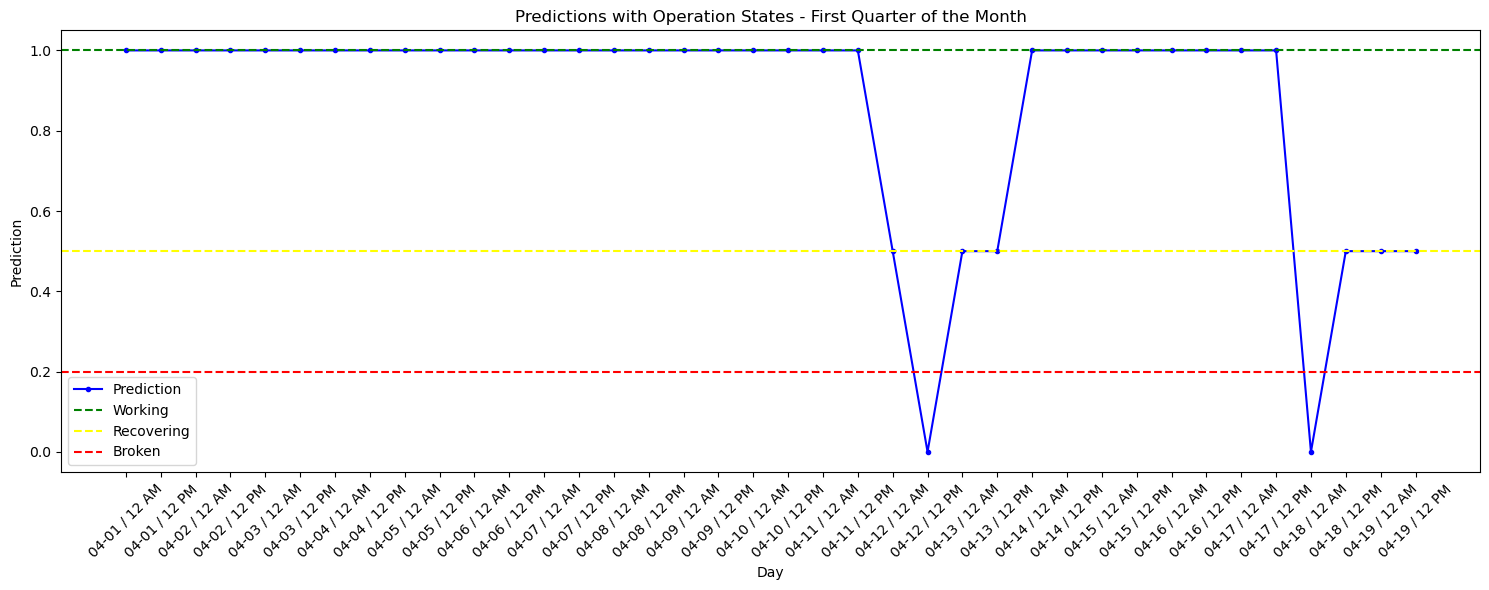

In [19]:
import matplotlib.pyplot as plt

quarter_length = len(mean_predictions) // 8
# Filter the data for the first quarter of the month
quarter_data = mean_predictions.iloc[:quarter_length]

# Plotting the main prediction line in blue for the quarter data
plt.figure(figsize=(15, 6))
plt.plot(quarter_data['day'], quarter_data['Operation'], color='blue', marker='.', label="Prediction")

# Add horizontal lines for operation states
plt.axhline(y=1.0, color='green', linestyle='--', label='Working')
plt.axhline(y=0.5, color='yellow', linestyle='--', label='Recovering')
plt.axhline(y=0.2, color='red', linestyle='--', label='Broken')

# Customize plot
plt.title('Predictions with Operation States - First Quarter of the Month')
plt.xlabel('Day')
plt.ylabel('Prediction')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

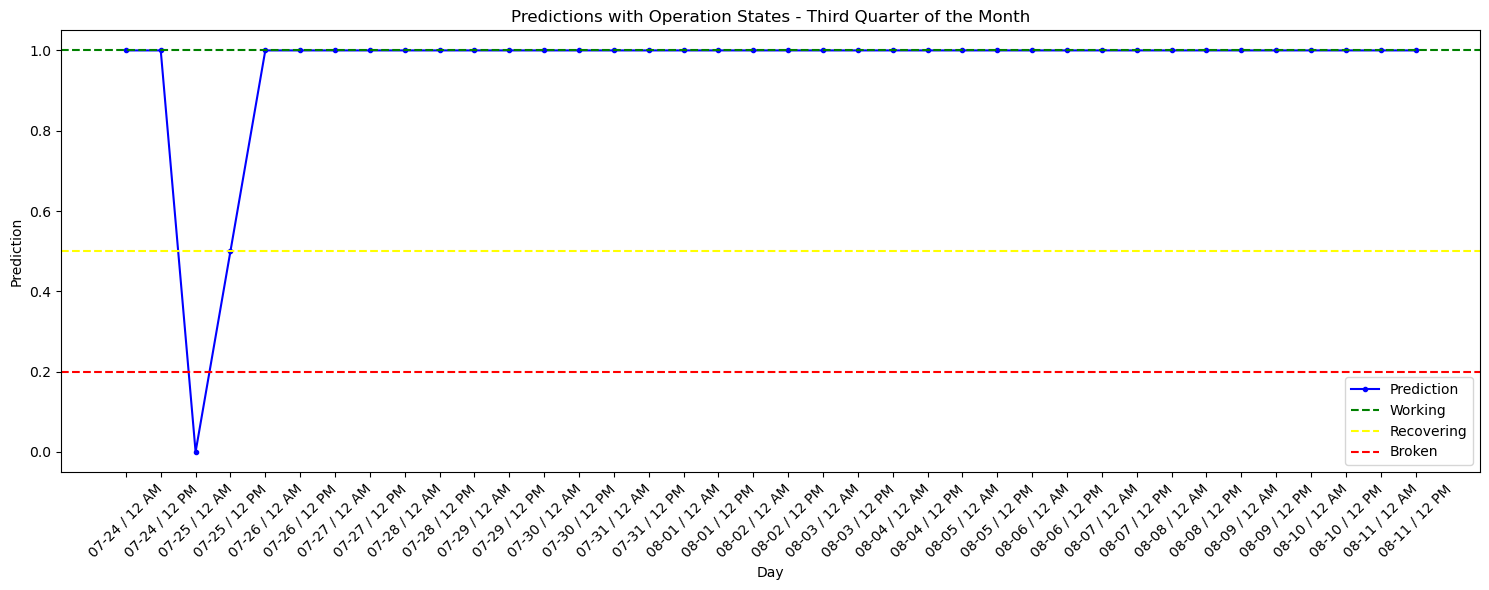

In [45]:
import matplotlib.pyplot as plt

quarter_length = len(mean_predictions) // 8

# Calculate the start and end indices for the third quarter
start_idx = 6 * quarter_length
end_idx = 7 * quarter_length

# Filter the data for the third quarter
quarter_data = mean_predictions.iloc[start_idx:end_idx]

# Plotting the main prediction line in blue for the quarter data
plt.figure(figsize=(15, 6))
plt.plot(quarter_data['day'], quarter_data['Operation'], color='blue', marker='.', label="Prediction")

# Add horizontal lines for operation states
plt.axhline(y=1.0, color='green', linestyle='--', label='Working')
plt.axhline(y=0.5, color='yellow', linestyle='--', label='Recovering')
plt.axhline(y=0.2, color='red', linestyle='--', label='Broken')

# Customize plot
plt.title('Predictions with Operation States - Third Quarter of the Month')
plt.xlabel('Day')
plt.ylabel('Prediction')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


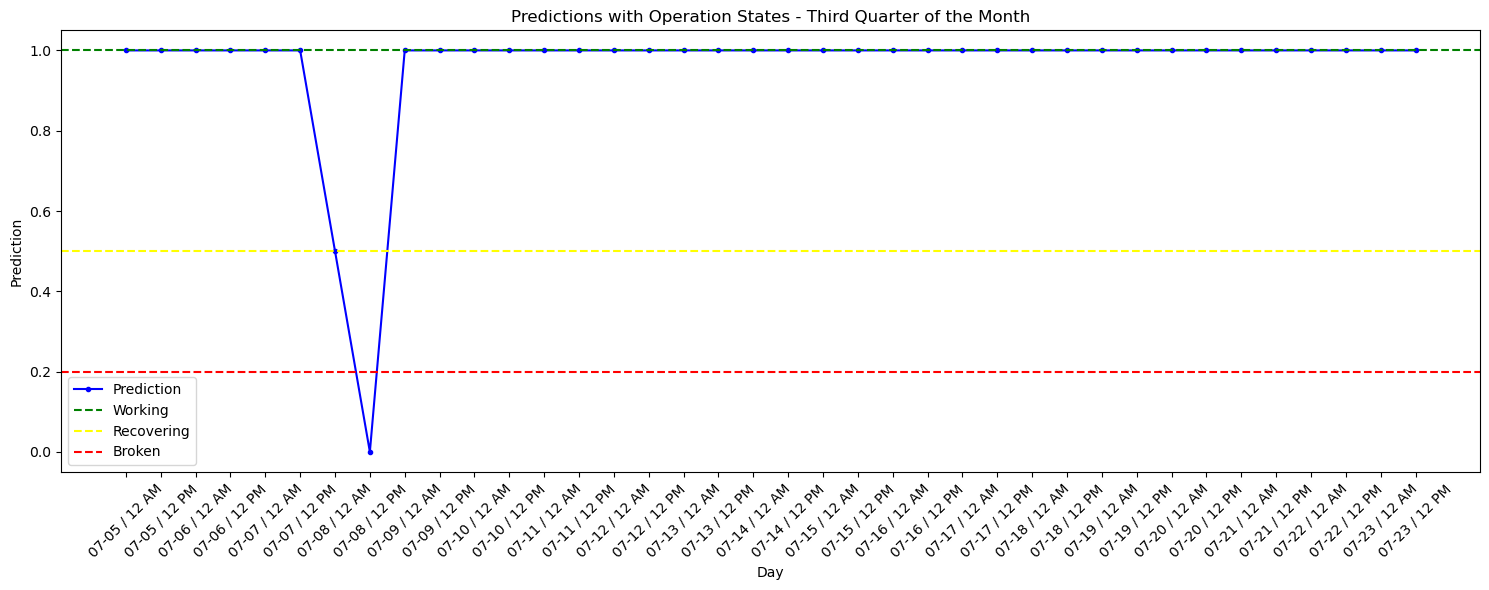

In [21]:
import matplotlib.pyplot as plt

quarter_length = len(mean_predictions) // 8

# Calculate the start and end indices for the third quarter
start_idx =5 * quarter_length
end_idx = 6 * quarter_length

# Filter the data for the third quarter
quarter_data = mean_predictions.iloc[start_idx:end_idx]

# Plotting the main prediction line in blue for the quarter data
plt.figure(figsize=(15, 6))
plt.plot(quarter_data['day'], quarter_data['Operation'], color='blue', marker='.', label="Prediction")

# Add horizontal lines for operation states
plt.axhline(y=1.0, color='green', linestyle='--', label='Working')
plt.axhline(y=0.5, color='yellow', linestyle='--', label='Recovering')
plt.axhline(y=0.2, color='red', linestyle='--', label='Broken')

# Customize plot
plt.title('Predictions with Operation States - Third Quarter of the Month')
plt.xlabel('Day')
plt.ylabel('Prediction')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
